In [59]:
import numpy as np
from os import listdir
from os.path import isfile, join
import csv
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
import pandas as pd

In [2]:
mypath = './microgrid/'
onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath, f))]
print(onlyfiles[0:2])
print(onlyfiles[len(onlyfiles)-2:len(onlyfiles)])

['2011-04-02-b1002.csv', '2011-04-02-b1005.csv']
['2011-04-02-b997.csv', 'FORMAT']


In [3]:
onlycsv = onlyfiles[0:len(onlyfiles)-1]
print(len(onlyfiles))
print(len(onlycsv))

444
443


In [4]:
onlycsv_noextn = onlycsv[0].rstrip('.csv')
print(onlycsv_noextn)

2011-04-02-b1002


In [5]:
onlycsv_noextn = list(map(lambda x: x.rstrip('.csv'),onlycsv))
print(onlycsv_noextn[0:2])

['2011-04-02-b1002', '2011-04-02-b1005']


In [6]:
bldgnum = list(map(lambda x: int(x[12:len(x)]),onlycsv_noextn))
print(bldgnum[0:2])

[1002, 1005]


In [61]:
print(len(bldgnum))

443


In [92]:
content_bldg_all = np.empty([1,3])
nrows = np.zeros([len(bldgnum)])
for k in range(0,len(bldgnum)):
    content = ''
    with open('./microgrid/'+onlycsv[k], newline='') as csvfile:
        reader = csv.reader(csvfile,quoting=csv.QUOTE_NONNUMERIC)
        for row in reader:
            nrows[k] = nrows[k]+1
        print(nrows[k])
    content = np.zeros([nrows[k],2])
    m = 0
    with open('./microgrid/'+onlycsv[k], newline='') as csvfile:
        reader = csv.reader(csvfile,quoting=csv.QUOTE_NONNUMERIC)
        for row in reader:
            content[m,0] = int(row[0])
            content[m,1] = row[1]
            m = m+1
    content_bldg = np.hstack((np.ones([nrows[k],1])*bldgnum[k], content))
    content_bldg_all = np.vstack((content_bldg_all,content_bldg))
content_bldg_all = content_bldg_all[1:(content_bldg_all.shape[0]),:]
print(content_bldg_all.shape)
print(content_bldg_all)

1440.0
1440.0
1440.0
1440.0
1440.0
1440.0
1440.0
1440.0
1440.0
1440.0
1440.0
1440.0
1440.0
1440.0
1440.0
1440.0
1440.0
1440.0
1440.0
1440.0
1440.0
1440.0
1440.0
1440.0
1440.0
1440.0
1440.0
1440.0
1440.0
1440.0
1440.0
1440.0
1440.0
1440.0
1440.0


/Users/rraghu/anaconda/envs/py3k/lib/python3.5/site-packages/ipykernel/__main__.py:10: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Users/rraghu/anaconda/envs/py3k/lib/python3.5/site-packages/numpy/core/numeric.py:190: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  a = empty(shape, dtype, order)


1440.0
1440.0
1440.0
1440.0
1440.0
1440.0
1440.0
1440.0
1440.0
1440.0
1440.0
1440.0
1440.0
1440.0
1440.0
1440.0
1440.0
1440.0
1440.0
1440.0
1440.0
1440.0
1440.0
1440.0
1440.0
1440.0
1440.0
1440.0
1440.0
1440.0
1440.0
1440.0
1440.0
1440.0
1440.0
1440.0
1440.0
1440.0
1440.0
1440.0
1440.0
1440.0
1440.0
1440.0
1440.0
1440.0
1440.0
1440.0
1440.0
1440.0
1440.0
1440.0
1440.0
1440.0
1440.0
1440.0
1440.0
1440.0
1440.0
1440.0
1440.0
1440.0
1440.0
1440.0
1440.0
1440.0
1440.0
1440.0
1440.0
1440.0
1440.0
1440.0
1440.0
1440.0
1440.0
1440.0
1440.0
1440.0
1440.0
1440.0
1440.0
1440.0
1440.0
1440.0
1440.0
1440.0
1440.0
1440.0
1440.0
1440.0
1440.0
1440.0
1440.0
1440.0
1440.0
1440.0
1440.0
1440.0
1440.0
1440.0
1440.0
1440.0
1440.0
1440.0
1440.0
1440.0
1440.0
1440.0
1440.0
1440.0
1440.0
1440.0
1440.0
1440.0
1440.0
1440.0
1440.0
1440.0
1440.0
1440.0
1440.0
1440.0
1440.0
1440.0
1440.0
1440.0
1440.0
1440.0
1440.0
1440.0
1440.0
1440.0
1440.0
1440.0
1440.0
1440.0
1440.0
1440.0
1440.0
1440.0
1440.0
1440.0
1440.0

In [66]:
dfc = pd.DataFrame(content_bldg_all, columns=['bnum','tslocal','usagekw'])
print(type(dfc))

<class 'pandas.core.frame.DataFrame'>


In [67]:
sns.set_palette("husl")

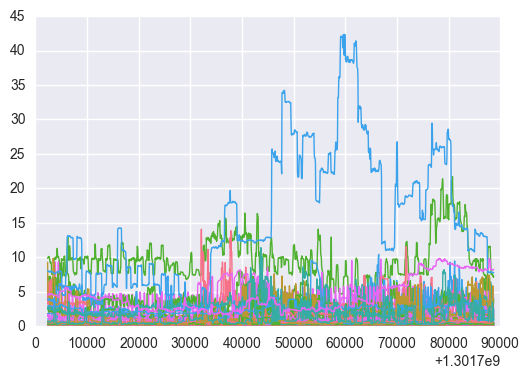

In [78]:
for i in range(400,443):
    plt.plot(dfc.tslocal[dfc.bnum==bldgnum[i]],dfc.usagekw[dfc.bnum==bldgnum[i]], lw=1.0)

In [95]:
with open('microgrid_all.csv', 'w', newline='') as csvfile:
    writer = csv.writer(csvfile, delimiter=',',
                            quotechar='|', quoting=csv.QUOTE_MINIMAL)
    k = 0
    for i in range(0,len(bldgnum)):
        for j in range(k,int(k+nrows[i])):
            writer.writerow(dfc.iloc[j])
        k = j+1

In [91]:
nrows[0,:]

array([ 1440.,  1440.,  1440.,  1440.,  1440.,  1440.,  1440.,  1440.,
        1440.,  1440.,  1440.,  1440.,  1440.,  1440.,  1440.,  1440.,
        1440.,  1440.,  1440.,  1440.,  1440.,  1440.,  1440.,  1440.,
        1440.,  1440.,  1440.,  1440.,  1440.,  1440.,  1440.,  1440.,
        1440.,  1440.,  1440.,  1440.,  1440.,  1440.,  1440.,  1440.,
        1440.,  1440.,  1440.,  1440.,  1440.,  1440.,  1440.,  1440.,
        1440.,  1440.,  1440.,  1440.,  1440.,  1440.,  1440.,  1440.,
        1440.,  1440.,  1440.,  1440.,  1440.,  1440.,  1440.,  1440.,
        1440.,  1440.,  1440.,  1440.,  1440.,  1440.,  1440.,  1440.,
        1440.,  1440.,  1440.,  1440.,  1440.,  1440.,  1440.,  1440.,
        1440.,  1440.,  1440.,  1440.,  1440.,  1440.,  1440.,  1440.,
        1440.,  1440.,  1440.,  1440.,  1440.,  1440.,  1440.,  1440.,
        1440.,  1440.,  1440.,  1440.,  1440.,  1440.,  1440.,  1440.,
        1440.,  1440.,  1440.,  1440.,  1440.,  1440.,  1440.,  1440.,
      